In [1]:
import sys; sys.path.append('/rds/general/user/cb2714/home/01_wwa/'); from wwa import *

### **IOD**

In [5]:

# ! cd ../../99_ephemera; wget http://webext.cgd.ucar.edu/Multi-Case/CVDP_repository/cmip5.rcp85/cmip5.rcp85.cvdp_data.tar
# ! cd ../../99_ephemera; wget http://webext.cgd.ucar.edu/Multi-Case/CVDP_repository/cmip5.historical/cmip5.historical.cvdp_data.tar

URL transformed to HTTPS due to an HSTS policy
--2024-01-10 11:09:00--  https://webext.cgd.ucar.edu/Multi-Case/CVDP_repository/cmip6.hist_ssp585/cmip6.hist_ssp585.cvdp_data.tar
Resolving webext.cgd.ucar.edu (webext.cgd.ucar.edu)... 2a0c:5bc0:4c:ff::8075:d36, 128.117.13.54
Connecting to webext.cgd.ucar.edu (webext.cgd.ucar.edu)|2a0c:5bc0:4c:ff::8075:d36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9013452800 (8.4G) [application/x-tar]
Saving to: ‘cmip6.hist_ssp585.cvdp_data.tar’

cmip6.hist_ssp585.c 100%[===================>]   8.39G  22.2MB/s    in 6m 44s  

2024-01-10 11:15:44 (21.3 MB/s) - ‘cmip6.hist_ssp585.cvdp_data.tar’ saved [9013452800/9013452800]

URL transformed to HTTPS due to an HSTS policy
--2024-01-10 11:15:44--  https://webext.cgd.ucar.edu/Multi-Case/CVDP_repository/cmip5.rcp85/cmip5.rcp85.cvdp_data.tar
Resolving webext.cgd.ucar.edu (webext.cgd.ucar.edu)... 2a0c:5bc0:4c:ff::8075:d36, 128.117.13.54
Connecting to webext.cgd.ucar.edu (webext.cgd.

In [6]:
# unpack
! cd ../../99_ephemera; tar -xf cmip6.hist_ssp585.cvdp_data.tar

# ! cd ../../99_ephemera; tar -xf cmip5.rcp85.cvdp_data.tar
# ! cd ../../99_ephemera; tar -xf cmip5.historical.cvdp_data.tar

! mv *cvdp_data*.nc ../00_WWA_project_folder/ephemeral/cvdp/cmip6

mv: cannot stat '*cvdp_data*.nc': No such file or directory


In [73]:
# !mv ../00_WWA_project_folder/ephemeral/cvdp/cmip5/*.tar .

## **Extract IOD & Nino3.4**

### **CMIP6**

In [5]:
# download CVDP data (about 16gb in total so download to ephemeral space)
! cd ../../99_ephemera; wget http://webext.cgd.ucar.edu/Multi-Case/CVDP_repository/cmip6.hist_ssp585/cmip6.hist_ssp585.cvdp_data.tar

# unpack
! cd ../../99_ephemera; tar -xf cmip6.hist_ssp585.cvdp_data.tar

In [24]:
# extract indices of interest
cvdp_list = glob.glob("../../99_ephemera/*cvdp_data.1900-2100.nc")[10:]
fpath = "../../00_WWA_project_folder/live/data/CVDP_modes-of-variability/"

for fnm in cvdp_list:
    print(fnm)
    ds = xr.open_dataset(fnm, decode_times = False)
    if "TIME" in ds.dims and not "time" in ds.dims: ds = ds.rename(TIME = "time")
    if not "time" in ds.dims: continue
    ds = decode_times(ds)    
    
    if "indian_ocean_dipole" in ds.variables: 
        iod = ds.indian_ocean_dipole.rename("iod")
        iod_fnm = fpath+"iod_cmip6/cvdp-iod_cmip6_"+re.sub(".cvdp_data.+", "", fnm.split("/")[-1])+".nc"
        iod.to_netcdf(iod_fnm)
        
    if "nino34" in ds.variables: 
        nino34 = ds.nino34
        nino_fnm = fpath+"nino34_cmip6/cvdp-nino34_cmip6_"+re.sub(".cvdp_data.+", "", fnm.split("/")[-1])+".nc"
        nino34.to_netcdf(nino_fnm)

clear_output(wait = False)
print("Done.")

In [25]:
ds

<xarray.Dataset>
Dimensions:                         (TIME: 201, lat: 64, lon: 128, ncurves: 4,
                                     frequency: 1206, time: 2412,
                                     time_lag_cor: 31, lev: 45, lat_amoc: 290,
                                     frequency2: 100, longitude: 57,
                                     time_mon3: 49, time_mon1: 29,
                                     time_mon2: 12, period: 135)
Coordinates: (12/15)
  * TIME                            (TIME) int32 1900 1901 1902 ... 2099 2100
  * frequency                       (frequency) float32 0.0004146 ... 0.5
  * frequency2                      (frequency2) float32 0.004975 ... 0.4975
  * lat                             (lat) float64 -87.86 -85.1 ... 85.1 87.86
  * lat_amoc                        (lat_amoc) float64 -78.29 -78.09 ... 89.51
  * lev                             (lev) float64 0.0 6.194 ... 5.25e+03 5.5e+03
    ...                              ...
  * period                          (period) float32 0.08609 0.09121 ... 197.9
  * time                            (time) datetime64[ns] 1900-01-15 ... 2100...
  * time_lag_cor                    (time_lag_cor) int32 -15 -14 -13 ... 14 15
  * time_mon1                       (time_mon1) int32 0 1 2 3 4 ... 25 26 27 28
  * time_mon2                       (time_mon2) int32 0 1 2 3 4 5 6 7 8 9 10 11
  * time_mon3                       (time_mon3) int32 0 1 2 3 4 ... 45 46 47 48
Data variables: (12/331)
    amo_pattern_lowpass_mon         (lat, lon) float32 ...
    amo_pattern_mon                 (lat, lon) float32 ...
    amo_pr_regression_lowpass_mon   (lat, lon) float32 ...
    amo_pr_regression_mon           (lat, lon) float32 ...
    amo_spectra                     (ncurves, frequency) float32 ...
    amo_tas_regression_lowpass_mon  (lat, lon) float32 ...
    ...                              ...
    tas_trends_djf                  (lat, lon) float32 ...
    tas_trends_jja                  (lat, lon) float32 ...
    tas_trends_mam                  (lat, lon) float32 ...
    tas_trends_mon                  (lat, lon) float32 ...
    tas_trends_son                  (lat, lon) float32 ...
    tropical_indian_ocean           (time) float32 ...
Attributes:
    source:       NCAR Climate Analysis Section's Climate Variability Diagnos...
    notes:        Data from CanESM5 r15i1p1f1 from 1900-2100
    climatology:  1900-2100 climatology removed prior to all calculations (ot...
    Conventions:  CF-1.6
    history:      Thu Sep  9 14:48:13 2021: ncks -O /project/diagnostics/exte...
    NCO:          "4.5.2"

### **CMIP5**

In [188]:
clist = glob.glob("../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/cordex/rx3day-dat/*.dat")
gcms = list(set(["_".join(fnm.split("_")[6:8]) for fnm in clist]))
gcms = ['NorESM1-M_1',  'GFDL-ESM2G_1', 'IPSL-CM5A-LR_1', 'HadGEM2-ES_1', 'MIROC5_1',
         'CanESM2_1', 'EC-EARTH_12', 'EC-EARTH_2', 'EC-EARTH_3', 'MPI-ESM-MR_1',
         'CNRM-CM5_1', 'MPI-ESM-LR_1']

iod_ds = []
for gcm in gcms:    
    
    fl = glob.glob("../00_WWA_project_folder/ephemeral/cvdp/cmip5/"+gcm+"*.nc")
    if len(fl) == 0: continue
        
    ds = [decode_times(xr.open_dataset(fnm, decode_times = False)) for fnm in fl]
    if not "indian_ocean_dipole" in ds[0].variables: continue
        
    iod = xr.concat([da.indian_ocean_dipole for da in ds], "time").rename("iod")
    
    iod = iod.rolling(time = 3).mean().groupby("time.month")[m]
    iod = iod.assign_coords(time = iod.time.dt.year).rename("year")
    
    # specify filename
    csv_fnm = "ts/iod-"+seas+"_cvdp_cmip5_"+gcm+".dat"
    if len(csv_fnm.split("/")[-1]) > 65: print("! Filename too long: ", csv_fnm)

    # create extra header lines for upload to Climate Explorer 
    str1 = "# contact :: "+seas.upper()+" mean of Indian Ocean Dipole - "+gcm+" - Horn of Africa flooding 2023, c.barnes22@imperial.ac.uk"
    str2 = "# iod [degC] IOD (downloaded from https://www2.cesm.ucar.edu/working_groups/CVC/cvdp/data-repository.html) at "+re.sub(".dat", "", csv_fnm.split("/")[-1])
    head = "# year iod"

    # make .dat file
    ! echo "$str1 " > $csv_fnm
    ! echo "$str2" >> $csv_fnm
    ! echo "$head" >> $csv_fnm
    iod.to_pandas().to_csv(csv_fnm, sep = " ", mode = "a", header = False)

### **HighResMIP**

In [184]:
clist = glob.glob("../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/HighResMIP/rx3day-dat/*.dat")
clist = sorted([re.sub(".dat", "", fnm.split("_")[-1])+"_r1i1p1f1" for fnm in clist])

for gcm in clist:    
    
    if gcm in ["FGOALS-g3+_r1i1p1f1"]: continue
    
    fl = glob.glob("../00_WWA_project_folder/ephemeral/cvdp/cmip6/"+gcm+"*.nc")
    if len(fl) == 0: continue
    print(fl[0], len(fl))
    
    ds = decode_times(xr.open_dataset(fl[0], decode_times = False))
    if not "indian_ocean_dipole" in ds.variables: continue
    
    iod = ds.indian_ocean_dipole
    iod = iod.rolling(time = 3).mean().groupby("time.month")[m]
    iod = iod.assign_coords(time = iod.time.dt.year).rename("year")
    
    # specify filename
    csv_fnm = "ts/iod-"+seas+"_cvdp_highresmip_"+gcm+".dat"
    if len(csv_fnm.split("/")[-1]) > 65: print("! Filename too long: ", csv_fnm)

    # create extra header lines for upload to Climate Explorer 
    str1 = "# contact :: "+seas.upper()+" mean of Indian Ocean Dipole - "+gcm+" - Horn of Africa flooding 2023, c.barnes22@imperial.ac.uk"
    str2 = "# iod [degC] IOD (downloaded from https://www2.cesm.ucar.edu/working_groups/CVC/cvdp/data-repository.html) at "+re.sub(".dat", "", csv_fnm.split("/")[-1])
    head = "# year iod"

    # make .dat file
    ! echo "$str1 " > $csv_fnm
    ! echo "$str2" >> $csv_fnm
    ! echo "$head" >> $csv_fnm
    iod.to_pandas().to_csv(csv_fnm, sep = " ", mode = "a", header = False)

../00_WWA_project_folder/ephemeral/cvdp/cmip6/FGOALS-f3-L_r1i1p1f1.cvdp_data.1900-2100.nc 1
../00_WWA_project_folder/ephemeral/cvdp/cmip6/IPSL-CM6A-LR_r1i1p1f1.cvdp_data.1900-2100.nc 1
../00_WWA_project_folder/ephemeral/cvdp/cmip6/MPI-ESM1-2-HR_r1i1p1f1.cvdp_data.1900-2100.nc 1


## **Check IOD quality**

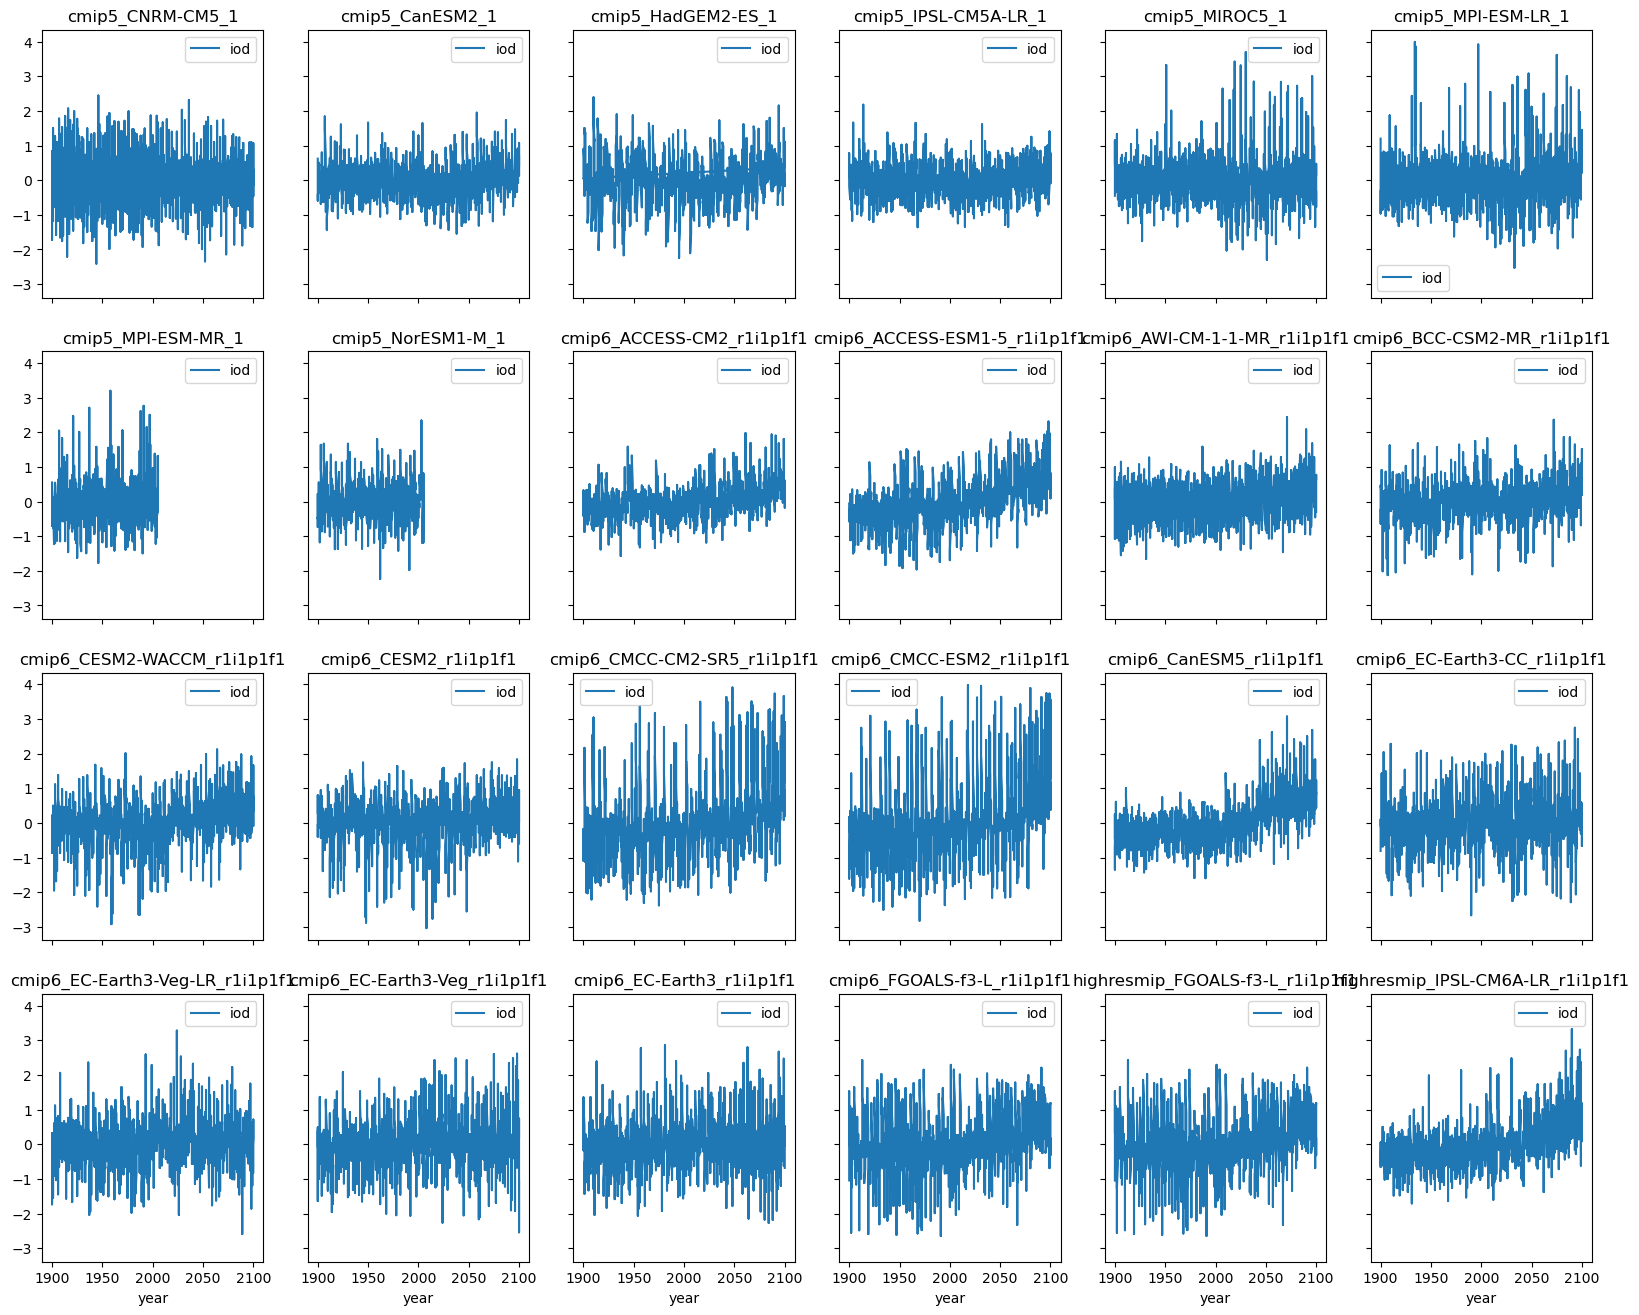

In [183]:
fl = sorted(glob.glob("ts/iod-cvdp_*"))  ## actually daily data, but mislabelled with years only
fig, axs = plt.subplots(ncols = 6, nrows = 4, figsize = (20,16), sharex = True, sharey = True)

for i in range(24):
    
    ts = pd.read_csv(fl[i], comment = "#", sep = " ", header = None, names = ["year", "iod"], index_col = 0)
    ts.plot(ax = fig.axes[i])
    fig.axes[i].set_title(re.sub(".dat", "", re.sub(".+cvdp_", "", fl[i])))

In [190]:
clist = glob.glob("../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/cordex/rx3day-dat/*.dat")

In [194]:
gcms = sorted(list(set(["_".join(fnm.split("_")[6:8]) for fnm in clist])))

In [196]:
glob.glob("../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/CMIP6/rx3day-dat/*.dat")

['../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/CMIP6/rx3day-dat/rx3day-ond_HoA_FGOALS-g3.dat',
 '../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/CMIP6/rx3day-dat/rx3day-ond_HoA_CESM2-WACCM.dat',
 '../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/CMIP6/rx3day-dat/rx3day-ond_HoA_CanESM5-1.dat',
 '../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/CMIP6/rx3day-dat/rx3day-ond_HoA_MPI-ESM-1-2-HAM.dat',
 '../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/CMIP6/rx3day-dat/rx3day-ond_HoA_MPI-ESM1-2-LR.dat',
 '../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/CMIP6/rx3day-dat/rx3day-ond_HoA_GISS-E2-2-G.dat',
 '../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/timeseries/CMIP6/rx3day-dat/rx3day-ond_HoA_CMCC-ESM2.dat',
 '../00_WWA_project_folder/ephemeral/ModelSimulations-EastAfricaFloods/times